In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [4]:
# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 60
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

In [5]:
# Reshape input data to 3D for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [6]:
# Model Architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
# Model Training
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0051 - val_loss: 6.2991e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 5.7470e-04 - val_loss: 4.1794e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 4.4840e-04 - val_loss: 4.2098e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.0366e-04 - val_loss: 3.8525e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 3.4668e-04 - val_loss: 5.4943e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.5526e-04 - val_loss: 3.5927e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.2896e-04 - val_loss: 3.7688e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.3465e-04 - val_loss: 3.4072e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 3.3369e-04 - val_loss: 3.2776e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.8177e-04 - val_loss: 3.2473e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 3.

In [9]:
# Model Evaluation
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

mae = mean_absolute_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Mean Absolute Error: 3.5115472994451853
Root Mean Squared Error: 5.053782234795162


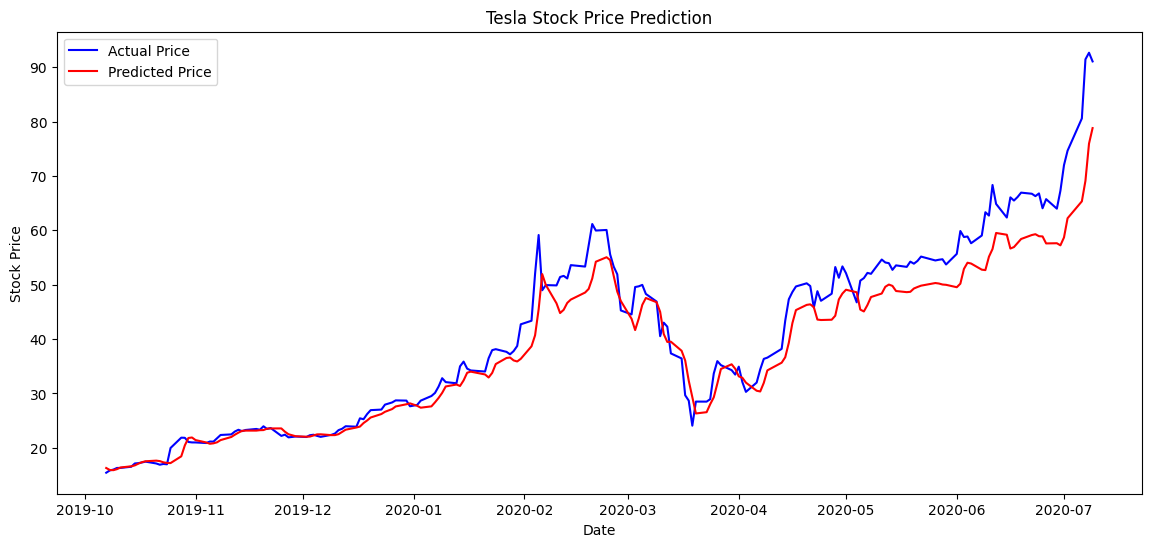

In [10]:
# Visualize the results
plt.figure(figsize=(14, 6))
plt.plot(data.index[-len(predictions):], Y_test, color='blue', label='Actual Price')
plt.plot(data.index[-len(predictions):], predictions, color='red', label='Predicted Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()